In [1]:
# Populating the interactive namespace from numpy, matplotlib, math
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from math import *

# input: longitudes of Israel coastline
lon = np.array([ 35.416667,  35.416667,  35.416667,  35.25    ,  35.25    ,
        35.25    ,  35.083333,  34.916667,  34.916667,  34.916667,
        34.916667,  34.916667,  34.75    ,  34.75    ,  34.583333,
        34.416667,  34.25    ,  34.083333,  33.916667,  33.75    ,
        33.583333,  33.416667])

In [2]:
# input: latitudes of Israel coastline
lat = np.array([ 33.75    ,  33.583333,  33.416667,  33.25    ,  33.083333,
        32.916667,  32.75    ,  32.75    ,  32.583333,  32.416667,
        32.25    ,  32.083333,  31.916667,  31.75    ,  31.583333,
        31.416667,  31.25    ,  31.25    ,  31.083333,  31.083333,
        31.083333,  31.083333])

In [34]:
def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees) using haversine 
    formula. As an input receives coordinates of the two points
    (the longitude  and the latitude of the first point and the 
    longitude and the latitude of the second point, respectfully)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    
    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    
    # radius of earth in kilometers is 6371
    dist = 6371000* c

    return dist

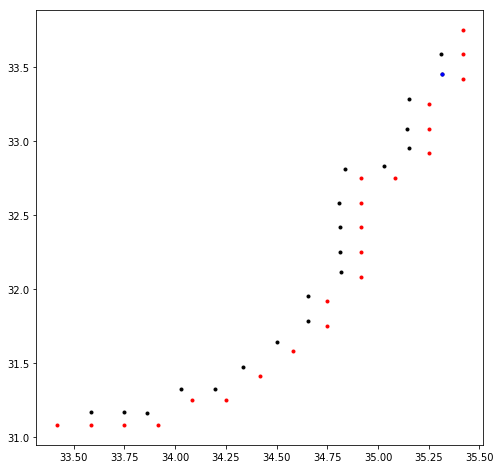

In [193]:
# plotting scatter points of coastline (red)
plt.figure(figsize=(8, 8))
plt.plot(lon, lat, 'r.')
plt.plot(lonx, laty, 'k.')
plt.plot(lons2, lats2, 'b.')

In [3]:
# Populating the interactive namespace from pymap3d
from pymap3d import geodetic2ned as g2ned
from pymap3d import ned2geodetic as ned2g

In [17]:
# Calculating cartesian coordinates of first point in g2ned (21 and 20) relative to 
# the second point (19, which is defined as (0,0))
(y2, x2, z2) = g2ned(lat[21], lon[21], 0, lat[19], lon[19], 0, ell=None, deg=True)
(y1, x1, z1) = g2ned(lat[20], lon[20], 0, lat[19], lon[19], 0, ell=None, deg=True)

In [140]:
m

array([  8.06878840e-15,  -4.20247747e-01,  -4.21053382e-01,
        -4.47755455e-15,  -4.22657751e-01,  -1.69458920e+00,
        -8.47188960e-01,  -7.72562972e-15,  -4.82249551e-15,
         8.36574962e-16,  -4.26602850e-01,  -4.27381071e-01,
        -4.28154390e-01,  -8.58692761e-01,  -8.60226482e-01,
        -1.72270444e+00,  -1.72574917e+00,  -1.72574917e+00,
         6.65860013e+02,   6.65862010e+02])

In [5]:
# the gradient of the line perpendicular to the line between the points (0,0) and (x2,y2)
# or the tangent of the angle (theta)nbetween the x axis and the line (to point (x2,y2))
m = -x2/y2

In [6]:
# 1/cos(theta)
r = sqrt(1 + m**2)

In [18]:
# calculating coordinates of the point at the distance 10000 m from (x1,y1) along the 
# line with the slope m
x = x1 - 10000/r
y = y1 + 10000*m/r

In [10]:
# defining x vector
dux = np.linspace(-36000, 0, num=5)

In [11]:
# calculating the y coordinates on the perpendicular line (given by slope m)
# and passing through (x1,y1)
duy = m*dux + y1 - m*x1

In [12]:
# calculating the y coordinates on the parallel line (given by slope -1/m)
duyor = -dux/m

In [154]:
# distance between two points (2 and 1)
haversine(lon[1], lat[1], lon[2], lat[2])

18532.413644142704

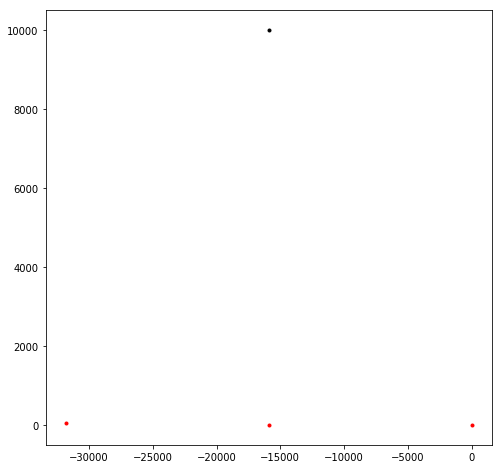

In [132]:
# plotting the points 19, 20, 21 and the point at the distance 10000 m from point 20
# perpendicular to the line between the points 21 and 19
plt.figure(figsize=(8, 8))
plt.plot(x2, y2, 'r.')
plt.plot(x1, y1, 'r.')
plt.plot(0, 0, 'r.')
plt.plot(x, y, 'k.')
#plt.plot(dux, duy, 'b')
#plt.plot(dux, duyor, 'r')
#plt.axis([-35000, 0, -35000, 0])

In [21]:
len_calc = len(lon) - 2

In [142]:
len_calc = len(lon) - 2
laty = np.zeros(len_calc)
lonx = np.zeros(len_calc)
m = np.zeros(len_calc)

# for each point (with the exception of the two last points) on the given line (lon,lat)
for i in range(len_calc):
    
    # calculate the cartesian coordinates of the second next point relative to the given point
    (y2, x2, z2) = g2ned(lat[i + 2], lon[i + 2], 0, lat[i], lon[i], 0, ell=None, deg=True)
    
    # calculate the cartesian coordinates of the next point relative to the given point
    (y1, x1, z1) = g2ned(lat[i + 1], lon[i + 1], 0, lat[i], lon[i], 0, ell=None, deg=True)
    
    # if the points do not lie on the horizontal line (to avoid division by zero)
    if fabs(y2) > 100:
        
        # calculate the gradient of the line perpendicular to the line between the points (0,0) and (x2,y2)
        # or the tangent of the angle (theta) between the x axis and the line (to point (x2,y2))
        m[i] = -x2/y2
        
        # calculate 1/cos(theta)
        r = sqrt(1 + m[i]**2)
        
        # calculate coordinates of the point at the distance 10000 m from (x1,y1) along the 
        # line with the slope m
        x = x1 - 10000/r
        y = y1 - 10000*m[i]/r
        
        # calculate the geodetic coordinates of the point (x,y)
        (laty[i], lonx[i], lonz) = ned2g(y, x, 0, lat[i], lon[i], 0, ell=None, deg=True)
        
    # if the points lie on the horizontal line 
    else:
        x = x1 
        y = y1 + 10000
        (laty[i], lonx[i], lonz) = ned2g(y, x, 0, lat[i], lon[i], 0, ell=None, deg=True)

In [23]:
laty = np.zeros(len_calc)

In [25]:
laty.shape

(20,)

In [145]:
# Populating the interactive namespace from pyproj
import pyproj
geod = pyproj.Geod(ellps="WGS84")

In [165]:
# calculate coordinates of the point at 10000m
# in the perpendicular direction 
lons2, lats2, backaz2 = geod.fwd(lon[1], lat[1], az1 + 90, 10000, radians=False)

In [157]:
lonx[1], laty[1]

(35.317510787798099, 33.451558748126232)

In [163]:
geod.inv?

In [164]:
# calculate distance and angles from point 0 to point 2
az1, az2, dist = geod.inv(lon[0], lat[0], lon[2], lat[2], radians=False)

In [262]:
# for the first subfault
p1 = lon[0]
p2 = lat[0]
lons2 = []
lats2 = []
i = 1

# calculate distance and angles from current position to the next point along the fault
az1, az2, dist0 = geod.inv(p1, p2, lon[i], lat[i], radians=False)

dist = 20000

# if the distance to the next point is smaller than the required distance 
if dist0 < 20000:
    
    # move the current position to the next point
    p1 = lon[i] 
    p2 = lat[i]
    
    # calculate distance and angles from current position to the next point along the fault
    az1, az2, dist1 = geod.inv(p1, p2, lon[i + 1], lat[i + 1], radians=False)
    
    # calculate the remaining distance
    dist = 20000 - dist0
    i = i + 1
    
# if the distance to the next point is greater than the required distance     
else:
    i = i + 1  
    
# calculate coordinates of the point on the fault at the required distance 
# in the direction of the next point
lons, lats, backaz = geod.fwd(p1, p2, az1, dist, radians=False)

# calculate coordinates of the point at the half of required width 
# in the perpendicular direction (coordinates of the center of the subfault)
dlons2, dlats2, backaz = geod.fwd(lons, lats, az1 + 90, 10000, radians=False)

# save the coordinates of the subfault
lons2.append(dlons2)
lats2.append(dlats2)

# move the current position to the coordinate of the subfault on the fault
p1 = lons
p2 = lats

In [264]:
lons2

[35.30896415184819, 35.313391576613235]

In [263]:
# the same as above for the second subfault
az1, az2, dist0 = geod.inv(p1, p2, lon[i], lat[i], radians=False)
dist = 20000
if dist0 < 20000:
    p1 = lon[i] 
    p2 = lat[i]
    az1, az2, dist1 = geod.inv(p1, p2, lon[i + 1], lat[i + 1], radians=False)
    dist = 20000 - dist0
    i = i + 1
else:
    i = i + 1 
lons, lats, backaz = geod.fwd(p1, p2, az1, dist, radians=False)
dlons2, dlats2, backaz = geod.fwd(lons, lats, az1 + 90, 10000, radians=False)
lons2.append(dlons2)
lats2.append(dlats2)
p1 = lons
p2 = lats

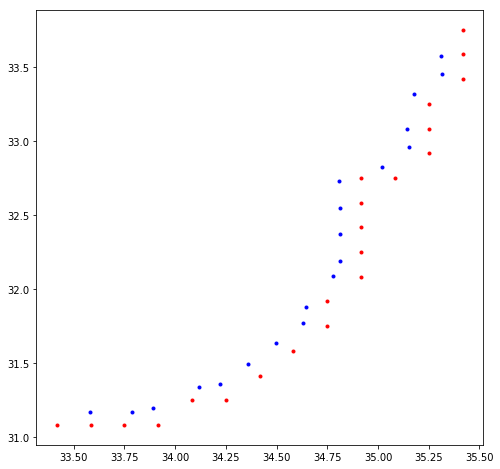

In [277]:
# plotting the scatter plot of the coastline (fault) and the centres of the subfaults
plt.figure(figsize=(8, 8))
plt.plot(lon, lat, 'r.')
#plt.plot(lonx, laty, 'k.')
plt.plot(lons2, lats2, 'b.')

In [272]:
# for all the points on the fault
n = len(lon) - 2
p1 = lon[0]
p2 = lat[0]
lons2 = []
lats2 = []
i = 0
D = 20000
d = D
w = 20000

while True:
    # calculate distance and angles from current position to the next point along the fault
    az1, az2, dist = geod.inv(p1, p2, lon[i + 1], lat[i + 1], radians=False)
    
    # if the distance to the next point is greater than the required distance
    if dist > d:
        
        # calculate coordinates of the point on the fault at the required distance 
        # in the direction of the next point
        p1, p2, backaz = geod.fwd(p1, p2, az1, d, radians=False)
        
        # calculate coordinates of subfault center at the required distance 
        # perpendicular to the fault
        dlons2, dlats2, backaz = geod.fwd(p1, p2, az1 + 90, w/2, radians=False)
        
        # save the coordinates of the subfault
        lons2.append(dlons2)
        lats2.append(dlats2)
        d = D
        
    # if the distance to the next point is smaller than the required distance        
    else:
        
        # move the current position to the next point and calculate the remaining 
        # distance
        d = d - dist
        i = i + 1 
        p1 = lon[i]
        p2 = lat[i]
        
    if i > n:
        break

In [631]:
W

20000

In [276]:
len(lonx)

20

In [632]:
def create_subfaults(lon, lat, D, w, nlayers):
    """
    Calculates the coordinates and the strike angles of subfaults with
    length D along the fault and width w perpendicular to fault.
    As an input receives vectors of coordinates (in degrees) of the fault
    (longitude and latitude, respectfully, sorted by ascending longitude), 
    the length and the width of the subfault (in meters) and the desired 
    number of the subfault layers (in the direction perpendicular to the fault).
    """
    n = len(lon) - 2
    p1 = lon[0]
    p2 = lat[0]
    lons2 = []
    lats2 = []
    strike = []
    i = 0
    d = D/2
    while True:
        
        # calculate distance and angles from current position to the next point along the fault
        az1, az2, dist = geod.inv(p1, p2, lon[i + 1], lat[i + 1], radians=False)
        
        # if the distance to the next point is greater than the required distance
        if dist > d:
            
            # calculate coordinates of the point on the fault at the required distance 
            # in the direction of the next point
            p1, p2, backaz = geod.fwd(p1, p2, az1, d, radians=False)
            
            # calculate coordinates of subfault center at the required distance 
            # perpendicular to the fault if needed
            #dlons2, dlats2, backaz = geod.fwd(p1, p2, az1 - 90, w/2, radians=False)
            #lons2.append(dlons2)
            #lats2.append(dlats2)
            
            # save the coordinates and the strike angle of the subfault
            lons2.append(p1)
            lats2.append(p2)
            strike.append(az2)
            d = D
            
        # if the distance to the next point is smaller than the required distance 
        else:
            
            # move the current position to the next point and calculate the remaining 
            # distance
            d = d - dist
            i = i + 1 
            p1 = lon[i]
            p2 = lat[i]
        if i > n:
            break
            
    # when more than one layer are required
    if nlayers > 1:
        
        # find the number of subfaults in each layer
        len_layer = len(lons2)
        
        # for each layer
        for j in range(2, nlayers + 1):
            
            # for each subfault in the layer
            for i in range(len_layer):
                
                # calculate coordinates of the subfault at the required distance 
                #from the previous layer perpendicular to the fault
                b = i + len_layer*(j - 2)
                dlons2, dlats2, backaz = geod.fwd(lons2[b], lats2[b], strike[b] + 90, w, radians=False)
                
                # save the coordinates and the strike angle of the subfault
                lons2.append(dlons2)
                lats2.append(dlats2)
                strike.append(strike[b])
                
    return lons2, lats2, strike

In [420]:
# calculating coordinates and strike angles of subfaults (20 km of length, 20 km of width, 4 layers)
[lons2, lats2, strike] = create_subfaults(lon, lat, 20000, 20000,4)

In [421]:
# defining parameters of each subfault (in the example all parameters are uniformely distributed and do not 
# describe a real earthquake, they are used only for plotting the subfaults)
depth = 5*np.ones(len(lons2))
length = 20*np.ones(len(lons2))
width = 20*np.ones(len(lons2))
dip = 15*np.ones(len(lons2))
rake = -90*np.ones(len(lons2))
slip = 10*np.ones(len(lons2))

In [422]:
# writing the subfaults parameters in the csv file suitable for Geoclaw
with open("sasha2.csv", "w") as f:
    f.write("Longitude,Latitude,Depth,Length,Width,Strike,Dip,Rake,Slip\n")
    for long, latt, d, l, w, st, dipp, r, sl in zip(lons2, lats2, depth, length, width, strike, dip, rake, slip):
        f.write("{:.7},{:.7},{},{},{},{:.6},{},{},{}".format(long, latt, d, l, w, st, dipp, r, sl))
        f.write("\n")

In [334]:
# reading the csv file from Geoclaw (1 layer)
subfault_fname = 'sasha2.csv'
print(open(subfault_fname).read())

Longitude,Latitude,Depth,Length,Width,Strike,Dip,Rake,Slip
35.30896,33.56964,5.0,20.0,20.0,-180.0,15.0,90.0,10.0
35.31339,33.45376,5.0,20.0,20.0,-139.943,15.0,90.0,10.0
35.17541,33.31563,5.0,20.0,20.0,-139.955,15.0,90.0,10.0
35.1429,33.0796,5.0,20.0,20.0,-180.0,15.0,90.0,10.0
35.15504,32.9616,5.0,20.0,20.0,-139.782,15.0,90.0,10.0
35.01735,32.8238,5.0,20.0,20.0,-139.789,15.0,90.0,10.0
34.80998,32.73087,5.0,20.0,20.0,-180.0,15.0,90.0,10.0
34.8102,32.55053,5.0,20.0,20.0,-180.0,15.0,90.0,10.0
34.81041,32.37018,5.0,20.0,20.0,-180.0,15.0,90.0,10.0
34.81062,32.18982,5.0,20.0,20.0,-180.0,15.0,90.0,10.0
34.77983,32.08568,5.0,20.0,20.0,-139.519,15.0,90.0,10.0
34.64431,31.8814,5.0,20.0,20.0,-180.0,15.0,90.0,10.0
34.63259,31.77148,5.0,20.0,20.0,-139.417,15.0,90.0,10.0
34.49574,31.63446,5.0,20.0,20.0,-139.366,15.0,90.0,10.0
34.35886,31.49749,5.0,20.0,20.0,-139.37,15.0,90.0,10.0
34.22212,31.36068,5.0,20.0,20.0,-139.315,15.0,90.0,10.0
34.1197,31.34021,5.0,20.0,20.0,-89.9568,15.0,90.0,10.0
33.89063,31

In [423]:
# reading the csv file from Geoclaw (4 layers)
subfault_fname = 'sasha2.csv'
print(open(subfault_fname).read())

Longitude,Latitude,Depth,Length,Width,Strike,Dip,Rake,Slip
35.30896,33.56964,5.0,20.0,20.0,0.0,15.0,-90.0,10.0
35.31339,33.45376,5.0,20.0,20.0,39.965,15.0,-90.0,10.0
35.17541,33.31563,5.0,20.0,20.0,39.965,15.0,-90.0,10.0
35.1429,33.0796,5.0,20.0,20.0,0.0,15.0,-90.0,10.0
35.15504,32.9616,5.0,20.0,20.0,40.1276,15.0,-90.0,10.0
35.01735,32.8238,5.0,20.0,20.0,40.1276,15.0,-90.0,10.0
34.80998,32.73087,5.0,20.0,20.0,0.0,15.0,-90.0,10.0
34.8102,32.55053,5.0,20.0,20.0,0.0,15.0,-90.0,10.0
34.81041,32.37018,5.0,20.0,20.0,0.0,15.0,-90.0,10.0
34.81062,32.18982,5.0,20.0,20.0,0.0,15.0,-90.0,10.0
34.77983,32.08568,5.0,20.0,20.0,40.3923,15.0,-90.0,10.0
34.64431,31.8814,5.0,20.0,20.0,0.0,15.0,-90.0,10.0
34.63259,31.77148,5.0,20.0,20.0,40.4957,15.0,-90.0,10.0
34.49574,31.63446,5.0,20.0,20.0,40.547,15.0,-90.0,10.0
34.35886,31.49749,5.0,20.0,20.0,40.547,15.0,-90.0,10.0
34.22212,31.36068,5.0,20.0,20.0,40.598,15.0,-90.0,10.0
34.1197,31.34021,5.0,20.0,20.0,89.9568,15.0,-90.0,10.0
33.89063,31.19572,5.0,20.0,20

In [424]:
# reading the csv file from Geoclaw
input_units = {"length":"km", "width":"km", "depth":"km", "slip":"m"}
fault = dtopotools.CSVFault()
fault.read(subfault_fname, input_units=input_units)

In [319]:
# Populating the interactive namespace from geoclaw
from clawpack.geoclaw import dtopotools, topotools
import os
CLAW = os.environ['CLAW']

In [425]:
# printing the seismic moment and the moment magnitude
print("The seismic moment is %g N-m" % fault.Mo())
print("The Moment magnitude is %g" % fault.Mw())
print("  (Assuming the rigidity mu of all subfaults is the default value %g Pa)"\
      % fault.subfaults[0].mu)

The seismic moment is 1.28e+22 N-m
The Moment magnitude is 8.70481
  (Assuming the rigidity mu of all subfaults is the default value 4e+10 Pa)


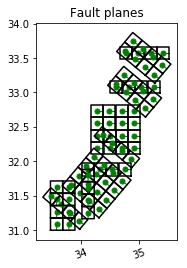

In [426]:
# plotting the subfaults (4 layers)
fault.plot_subfaults(plot_rake=True)

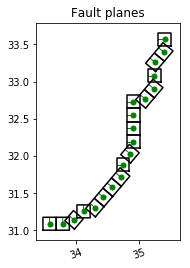

In [329]:
# plotting the subfaults (1 layer)
fault.plot_subfaults(plot_rake=True)

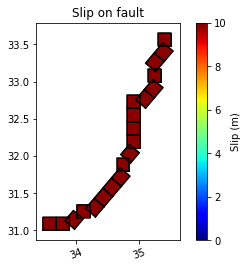

In [344]:
# plotting slip (1 layer, uniformely distributed)
fault.plot_subfaults(slip_color=True)

In [427]:
# defining parameters for the dtopography calculation (Okada)
xlower = 33.25
xupper = 36  # approximate - adjusted below
ylower = 30.75
yupper = 33.75  # approximate - adjusted below

# dtopo parameters:
points_per_degree = 60  # 1 minute resolution
dx = 1./points_per_degree
mx = int((xupper - xlower)/dx + 1)
xupper = xlower + (mx-1)*dx
my = int((yupper - ylower)/dx + 1)
yupper = ylower + (my-1)*dx

x = np.linspace(xlower,xupper,mx)
y = np.linspace(ylower,yupper,my)

In [428]:
# calculating fault topography using Okada (4 layers)
dtopo = fault.create_dtopography(x,y,times=[1.], verbose=True)

Making Okada dz for each of 80 subfaults
0..1..2..3..4..5..6..7..8..9..10..11..12..13..14..15..16..17..18..19..20..21..22..23..24..25..26..27..28..29..30..31..32..33..34..35..36..37..38..39..40..41..42..43..44..45..46..47..48..49..50..51..52..53..54..55..56..57..58..59..60..61..62..63..64..65..66..67..68..69..70..71..72..73..74..75..76..77..78..79..
Done


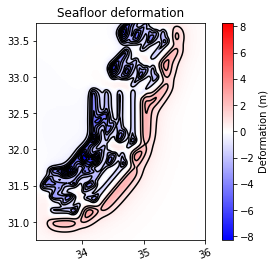

In [429]:
# plotting the Okada
dtopo.plot_dZ_colors(t=1)

In [431]:
# calculating coordinates and strike angles of subfaults (20 km of length, W width, 1 layer)
[lons2, lats2, strike] = create_subfaults(lon, lat, 20000, W, 1)

In [432]:
len(lons2)

20

In [395]:
lons2[39]

33.57942436338834

In [398]:
# checking the definition of the range of layers
len_layer = len(lons2)
for j in range(2, nlayers + 1):
    b = 5 + len_layer*(j - 2)
    print (b)

5


In [406]:
nlayers = 3

In [409]:
if nlayers > 1:
    len_layer = len(lons2)
    for j in range(2, nlayers + 1):
        for i in range(len_layer):
            b = i + len_layer*(j - 2)
            dlons2, dlats2, backaz = geod.fwd(lons2[b], lats2[b], strike[b] - 90, W, radians=False)
            lons2.append(dlons2)
            lats2.append(dlats2)
            strike.append(strike[b])

In [369]:
# calculating a number of subfaults in a layer
len_layer = len(lons2)

# for each subfault in the layer 
for i in range(len_layer):
    
    #calculate coordinates of the subfault at the required distance 
    #from the previous layer perpendicular to the fault
    dlons2, dlats2, backaz = geod.fwd(lons2[i], lats2[i], strike[i] - 90, W, radians=False)
    
    # save the coordinates and the strike angle of the subfault
    lons2.append(dlons2)
    lats2.append(dlats2)
    strike.append(strike[i])

In [363]:
W = 20000

In [478]:
# input: longitudes of Cyprian arc (approximate)
lon = np.array([32.01659883, 32.12934779, 32.24198274, 32.3550737, 32.43054368, 32.50578565, 32.58114163, 
                32.71310008, 32.86404004, 32.9959985, 33.09022196, 33.20354093, 33.33561339, 33.42972286, 
                33.52360432, 33.61759978, 33.67408826, 33.78729323, 33.8627632, 33.93834718, 34.05189416, 
                34.12770615, 34.18453663, 34.26023462, 34.35468609, 34.48687256, 34.63781251, 34.76977097, 
                34.88320394, 35.01561841, 35.0914304, 35.16712838, 35.22395887, 35.31863835, 35.41343183, 
                35.48935782, 35.54641632, 35.60347481, 35.66064731, 35.71781981, 35.77510631, 35.83262081,
                35.87103982, 35.89047733, 35.90991484, 35.92958036])

In [479]:
# input: latitudes of Cyprian arc (approximate)
lat = np.array([34.33724364, 34.27648004, 34.20061106, 34.18516365, 34.18493565, 34.15449685, 
                34.13916345, 34.12365904, 34.12320303, 34.10769862, 34.09230822, 34.10707161, 
                34.10667259, 34.0761768, 34.01547021, 33.96986901, 33.95459261, 33.9542506, 
                33.9540226, 33.96889999, 34.01387416, 34.05896234, 34.08900213, 34.11898492, 
                34.13380531, 34.14851169, 34.14805568, 34.13255127, 34.16242006, 34.20733723, 
                34.25242541, 34.2824082, 34.31244799, 34.35747917, 34.41761574, 34.47780932, 
                34.5380599, 34.59831048, 34.67366645, 34.74902242, 34.83948379, 34.96015596, 
                35.05067433, 35.1261443, 35.20161428, 35.30729505])

In [622]:
# calculating coordinates and strike angles of subfaults (50 km of length, 20 km of width, 2 layers)
[lons2, lats2, strike] = create_subfaults(lon, lat, 50000, 20000, 2)

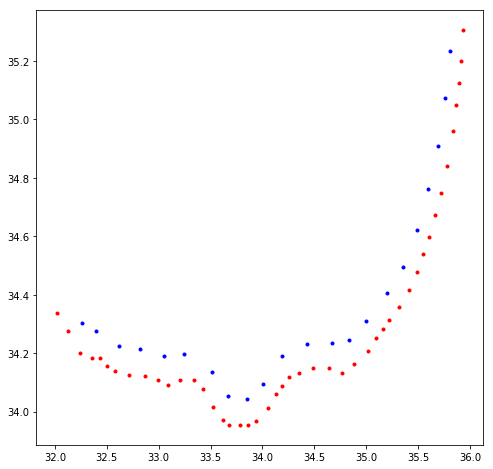

In [481]:
# plotting the scatter plot of the fault and the centres of the subfaults
plt.figure(figsize=(8, 8))
plt.plot(lon, lat, 'r.')
plt.plot(lons2, lats2, 'b.')

In [623]:
# defining parameters of each subfault (in the example all parameters are uniformely distributed and do not 
# describe a real earthquake, they are used only for plotting the subfaults)
depth = 5*np.ones(len(lons2))
length = 50*np.ones(len(lons2))
width = 20*np.ones(len(lons2))
dip = 15*np.ones(len(lons2))
rake = 90*np.ones(len(lons2))
slip = 10*np.ones(len(lons2))

In [624]:
# writing the subfaults parameters in the csv file suitable for Geoclaw
with open("cyprianarc.csv", "w") as f:
    f.write("Longitude,Latitude,Depth,Length,Width,Strike,Dip,Rake,Slip\n")
    for long, latt, d, l, w, st, dipp, r, sl in zip(lons2, lats2, depth, length, width, strike, dip, rake, slip):
        f.write("{:.7},{:.7},{},{},{},{:.6},{},{},{}".format(long, latt, d, l, w, st, dipp, r, sl))
        f.write("\n")

In [625]:
# viewing the csv file 
subfault_fname = 'cyprianarc.csv'
print(open(subfault_fname).read())

Longitude,Latitude,Depth,Length,Width,Strike,Dip,Rake,Slip
32.23578,34.20479,5.0,50.0,20.0,-50.9246,15.0,90.0,10.0
32.76274,34.12353,5.0,50.0,20.0,-89.7495,15.0,90.0,10.0
33.30016,34.10679,5.0,50.0,20.0,-89.7549,15.0,90.0,10.0
33.79193,33.95424,5.0,50.0,20.0,-89.7712,15.0,90.0,10.0
34.28263,34.12251,5.0,50.0,20.0,-100.658,15.0,90.0,10.0
34.81859,34.14542,5.0,50.0,20.0,-107.542,15.0,90.0,10.0
35.29982,34.34854,5.0,50.0,20.0,-119.801,15.0,90.0,10.0
35.66366,34.67764,5.0,50.0,20.0,-147.916,15.0,90.0,10.0
35.88083,35.08871,5.0,50.0,20.0,-168.041,15.0,90.0,10.0
32.3728,34.34468,5.0,50.0,20.0,-50.9246,15.0,90.0,10.0
32.76369,34.30383,5.0,50.0,20.0,-89.7495,15.0,90.0,10.0
33.30109,34.28709,5.0,50.0,20.0,-89.7549,15.0,90.0,10.0
33.79279,34.13454,5.0,50.0,20.0,-89.7712,15.0,90.0,10.0
34.24245,34.29969,5.0,50.0,20.0,-100.658,15.0,90.0,10.0
34.7531,34.31732,5.0,50.0,20.0,-107.542,15.0,90.0,10.0
35.19159,34.50494,5.0,50.0,20.0,-119.801,15.0,90.0,10.0
35.47854,34.77326,5.0,50.0,20.0,-147.916,15.0,9

In [626]:
# reading the csv file from Geoclaw
input_units = {"length":"km", "width":"km", "depth":"km", "slip":"m"}
fault = dtopotools.CSVFault()
fault.read(subfault_fname, input_units=input_units)

In [440]:
# Populating the interactive namespace from geoclaw
from clawpack.geoclaw import dtopotools, topotools
import os
CLAW = os.environ['CLAW']

In [627]:
# Printing the seismic moment and the moment magnitude
print("The seismic moment is %g N-m" % fault.Mo())
print("The Moment magnitude is %g" % fault.Mw())
print("  (Assuming the rigidity mu of all subfaults is the default value %g Pa)"\
      % fault.subfaults[0].mu)

The seismic moment is 7.2e+21 N-m
The Moment magnitude is 8.53822
  (Assuming the rigidity mu of all subfaults is the default value 4e+10 Pa)


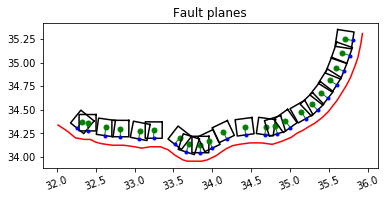

In [487]:
# plotting the subfaults (1 layer) with the centres of subfaults calculated, 
# fault line and the points that were supposed to be centres
fault.plot_subfaults(plot_rake=True)
plt.plot(lon, lat, 'r')
plt.plot(lons2, lats2, 'b.')

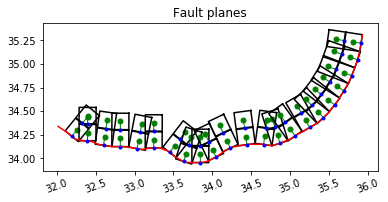

In [524]:
# plotting the subfaults (2 layers) with the subfaults given by the point on the line, 
# fault line and the locations of subfaults
fault.plot_subfaults(plot_rake=True)
plt.plot(lon, lat, 'r')
plt.plot(lons2, lats2, 'b.')

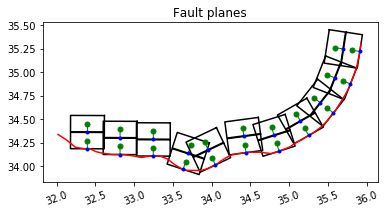

In [546]:
# plotting the subfaults (2 layers, bigger size) with the subfaults given by the point on the line, 
# fault line and the locations of subfaults
fault.plot_subfaults(plot_rake=True)
plt.plot(lon, lat, 'r')
plt.plot(lons2, lats2, 'b.')

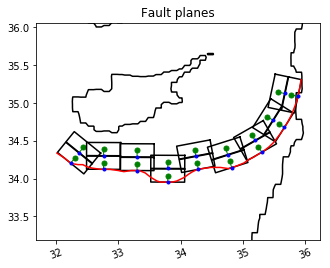

In [628]:
# plotting the subfaults (2 layers, 50 km length) with the subfaults given by the point on the line, 
# fault line, the locations of subfaults and the coastline
fault.plot_subfaults(plot_rake=True)
plt.plot(lon, lat, 'r')
plt.plot(lons2, lats2, 'b.')
plt.contour(fg.X[880:990, 100:170], fg.Y[880:990, 100:170], fg.B[880:990, 100:170], levels=[0], colors="k")

In [525]:
# Populating the interactive namespace from geoclaw
from clawpack.geoclaw import fgmax_tools, geoplot
# reading the output file
fg = fgmax_tools.FGmaxGrid()
fg.read_input_data("fgmax_grid.txt")
fg.read_output(outdir="_output")

Reading _output/fort.FG1.valuemax ...
Reading _output/fort.FG1.aux1 ...


In [599]:
fg.Y[120,220]

38.1875

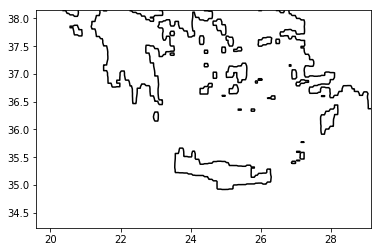

In [600]:
# plotting the coastline
plt.contour(fg.X[590:820, 125:220], fg.Y[590:820, 125:220], fg.B[590:820, 125:220], levels=[0], colors="k")

In [555]:
# input: longitudes of Hellenic arc (approximate)
lon1 = np.array([19.8686076, 20.00207124, 20.12339917, 20.23262055, 20.34187112, 20.46322822, 20.57242043, 
                20.68161265, 20.80294058, 20.92418099, 21.03331486, 21.17879751, 21.28798973, 21.40925931, 
                21.51842236, 21.6275854, 21.74885498, 21.87015374, 21.99142332, 22.11266373, 22.2459815, 
                22.35505703, 22.47632661, 22.59756702, 22.71886578, 22.85230024, 22.97362817, 23.10709181, 
                23.20417748, 23.32547624, 23.32547624, 23.48312378, 23.61652907, 23.74987602, 23.87111643, 
                24.0044342, 24.14988769, 24.27109892, 24.42862977, 24.57399574, 24.71936171, 24.87686339, 
                25.03436506, 25.20391493, 25.36135827, 25.5188016, 25.65197351, 25.80927098, 25.93021967, 
                26.05113918, 26.18413606, 26.31716211, 26.4622947, 26.58321421, 26.71626944, 26.8614312, 
                27.00662213, 27.13964818, 27.27273258, 27.39368126, 27.51460078, 27.63552029, 27.75641063, 
                27.84095219, 27.90128067, 27.96157998, 28.00977275, 28.04585898, 28.08194521, 28.13013799, 
                28.19046647, 28.26290148, 28.34741387, 28.43195542, 28.51652615, 28.60109688, 28.68566761])

In [556]:
# input: latitudes of Hellenic arc (approximate)
lat1 = np.array([37.91566265, 37.79518072, 37.68674699, 37.57831325, 37.45783133, 37.3373494, 37.24096386, 
                 37.14457831, 37.03614458, 36.96385542, 36.89156627, 36.80722892, 36.71084337, 36.62650602, 
                 36.54216867, 36.45783133, 36.37349398, 36.27710843, 36.19277108, 36.12048193, 36.06024096, 
                 36.01204819, 35.92771084, 35.85542169, 35.75903614, 35.65060241, 35.54216867, 35.42168675, 
                 35.3253012, 35.22891566, 35.22891566, 35.12048193, 35.02409639, 34.95180723, 34.87951807, 
                 34.81927711, 34.74698795, 34.68674699, 34.62650602, 34.59036145, 34.55421687, 34.5060241, 
                 34.45783133, 34.43373494, 34.40963855, 34.38554217, 34.38554217, 34.42168675, 34.46987952, 
                 34.53012048, 34.60240964, 34.6626506, 34.72289157, 34.78313253, 34.8313253, 34.87951807, 
                 34.91566265, 34.97590361, 35.01204819, 35.06024096, 35.12048193, 35.18072289, 35.25301205, 
                 35.3373494, 35.42168675, 35.51807229, 35.61445783, 35.71084337, 35.80722892, 35.90361446, 
                 35.98795181, 36.07228916, 36.1686747, 36.25301205, 36.3253012, 36.39759036, 36.46987952])

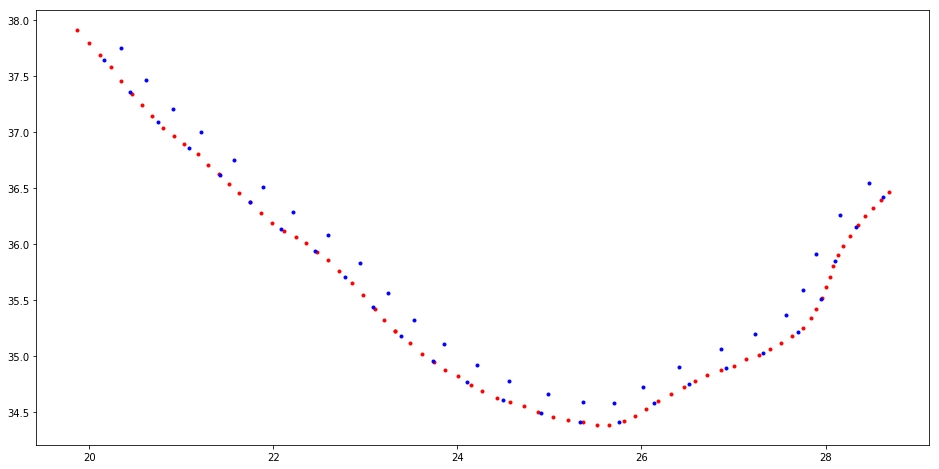

In [562]:
# plotting the scatter plot of the fault and the locations of 2 layers of the subfaults
plt.figure(figsize=(16, 8))
plt.plot(lon1, lat1, 'r.')
plt.plot(lons3, lats3, 'b.')

In [633]:
# calculating coordinates and strike angles of subfaults (40 km of length, 20 km of width, 2 layers)
[lons3, lats3, strike3] = create_subfaults(lon1, lat1, 40000, 20000, 2)

In [606]:
# defining parameters of each subfault (in the example all parameters are uniformely distributed and do not 
# describe a real earthquake, they are used only for plotting the subfaults)
depth = 5*np.ones(len(lons3))
length = 40*np.ones(len(lons3))
width = 20*np.ones(len(lons3))
dip = 15*np.ones(len(lons3))
rake = 90*np.ones(len(lons3))
slip = 10*np.ones(len(lons3))

In [607]:
# writing the subfaults parameters in the csv file suitable for Geoclaw
with open("hellenicarc.csv", "w") as f:
    f.write("Longitude,Latitude,Depth,Length,Width,Strike,Dip,Rake,Slip\n")
    for long, latt, d, l, w, st, dipp, r, sl in zip(lons3, lats3, depth, length, width, strike3, dip, rake, slip):
        f.write("{:.7},{:.7},{},{},{},{:.6},{},{},{}".format(long, latt, d, l, w, st, dipp, r, sl))
        f.write("\n")

In [608]:
# reading the csv file from Geoclaw
subfault_fname = 'hellenicarc.csv'
input_units = {"length":"km", "width":"km", "depth":"km", "slip":"m"}
fault = dtopotools.CSVFault()
fault.read(subfault_fname, input_units=input_units)

In [609]:
# Printing the seismic moment and the moment magnitude
print("The seismic moment is %g N-m" % fault.Mo())
print("The Moment magnitude is %g" % fault.Mw())
print("  (Assuming the rigidity mu of all subfaults is the default value %g Pa)"\
      % fault.subfaults[0].mu)

The seismic moment is 1.664e+22 N-m
The Moment magnitude is 8.78077
  (Assuming the rigidity mu of all subfaults is the default value 4e+10 Pa)


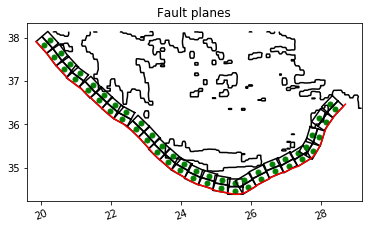

In [610]:
# plotting the subfaults (2 layers, 50 km length) with the subfaults given by the point on the line, 
# fault line and the coastline
fault.plot_subfaults(plot_rake=True)
plt.plot(lon1, lat1, 'r')
plt.contour(fg.X[590:820, 125:220], fg.Y[590:820, 125:220], fg.B[590:820, 125:220], levels=[0], colors="k")